# Unsupervised Learning - Clustering

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

In [8]:
%%capture
%run "./03_feature_selection.ipynb"

K=1: Inertia = 978.47
K=2: Inertia = 688.80
K=3: Inertia = 583.86
K=4: Inertia = 516.02
K=5: Inertia = 458.98
K=6: Inertia = 413.89
K=7: Inertia = 384.51


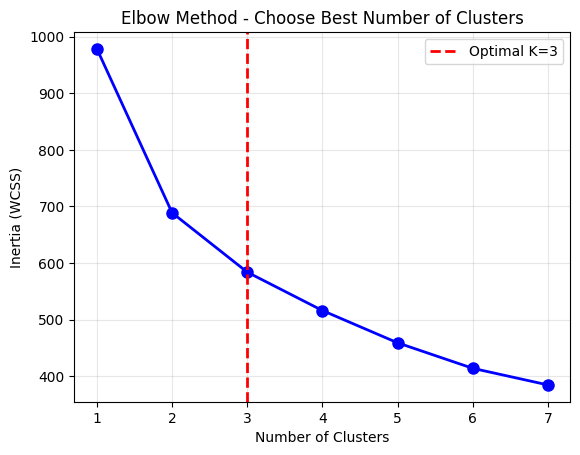

The red line shows where the 'elbow' bends - this is the best number of clusters
We choose K=3 because that's where the line stops decreasing rapidly
K-Means clustering done! 3 clusters created using the elbow method


In [9]:
# Find best number of clusters using elbow method
inertias = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_final)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: Inertia = {kmeans.inertia_:.2f}")

# Plot elbow curve with red line at k=3
plt.plot(range(1, 8), inertias, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=3, color='red', linestyle='--', linewidth=2, label='Optimal K=3')
plt.title('Elbow Method - Choose Best Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("The red line shows where the 'elbow' bends - this is the best number of clusters")
print("We choose K=3 because that's where the line stops decreasing rapidly")

# Use 3 clusters (as shown by the red line)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_final)
print("K-Means clustering done! 3 clusters created using the elbow method")

Creating dendrogram...


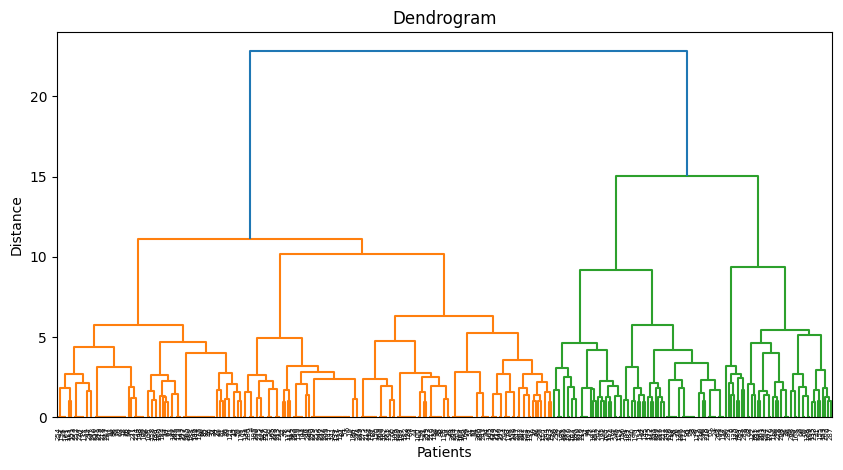

In [10]:
# Hierarchical clustering
print("Creating dendrogram...")

Z = linkage(X_final, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Now we can use cluster_labels and true_labels since they were created in previous cells
print("Comparing clusters with disease labels...")

print("K-Means Clusters vs Heart Disease:")
for cluster_num in range(3):
    cluster_data = true_labels[cluster_labels == cluster_num]
    disease_counts = np.bincount(cluster_data, minlength=5)
    print(f"Cluster {cluster_num}: {disease_counts}")

# Simple table
comparison = pd.crosstab(true_labels, cluster_labels, rownames=['Disease'], colnames=['Cluster'])
print("\nComparison Table:")
print(comparison)

Comparing clusters with disease labels...
K-Means Clusters vs Heart Disease:
Cluster 0: [145  28   6   5   0]
Cluster 1: [10 16 15 13  4]
Cluster 2: [ 5 10 14 17  9]

Comparison Table:
Cluster    0   1   2
Disease             
0        145  10   5
1         28  16  10
2          6  15  14
3          5  13  17
4          0   4   9


In [ ]:
# Compare clusters with actual heart disease
true_disease = y.values.ravel() if hasattr(y, 'values') else y

print("=== COMPARE CLUSTERS WITH ACTUAL DISEASE ===")

# Creating comparison table
comparison_df = pd.DataFrame({
    'Actual_Disease': true_disease,
    'Cluster_Group': cluster_labels
})

# Count how many of each disease in each cluster
cluster_comparison = pd.crosstab(comparison_df['Actual_Disease'], comparison_df['Cluster_Group'],
rownames=['Heart Disease'],colnames=['Cluster'])

print("Disease counts in each cluster:")
print(cluster_comparison)
print()

# Finding which disease is most common in each cluster
print("Most common disease in each cluster:")
for cluster_num in range(3):
    cluster_data = true_disease[cluster_labels == cluster_num]
    most_common_disease = np.bincount(cluster_data).argmax()
    count = np.bincount(cluster_data)[most_common_disease]
    total = len(cluster_data)
    
    print(f"Cluster {cluster_num}:")
    print(f"  Most common: Disease {most_common_disease} ({count}/{total} patients)")
    print(f"  Disease distribution: {np.bincount(cluster_data)}")
    print()

=== COMPARE CLUSTERS WITH ACTUAL DISEASE ===
Disease counts in each cluster:
Cluster          0   1   2
Heart Disease             
0              145  10   5
1               28  16  10
2                6  15  14
3                5  13  17
4                0   4   9

Most common disease in each cluster:
Cluster 0:
  Most common: Disease 0 (145/184 patients)
  Disease distribution: [145  28   6   5]

Cluster 1:
  Most common: Disease 1 (16/58 patients)
  Disease distribution: [10 16 15 13  4]

Cluster 2:
  Most common: Disease 3 (17/55 patients)
  Disease distribution: [ 5 10 14 17  9]



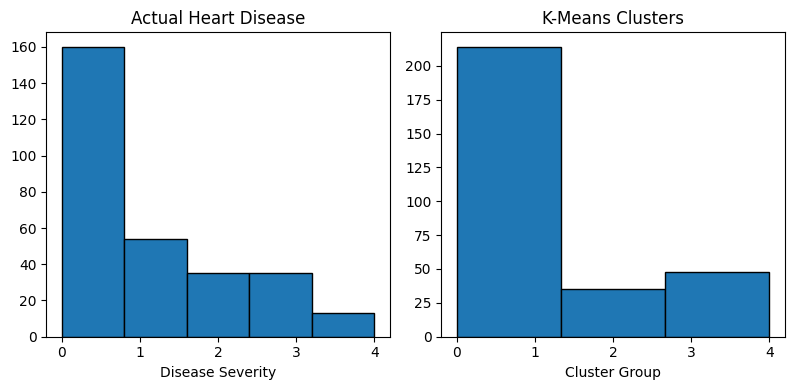

Histograms show how clusters relate to actual disease


In [14]:
# Simple histogram comparison
plt.figure(figsize=(12, 4))

# Actual disease
plt.subplot(1, 3, 1)
plt.hist(true_labels, bins=5, edgecolor='black')
plt.title('Actual Heart Disease')
plt.xlabel('Disease Severity')

# K-Means clusters
plt.subplot(1, 3, 2)
plt.hist(true_labels, bins=3, edgecolor='black')
plt.title('K-Means Clusters')
plt.xlabel('Cluster Group')

plt.tight_layout()
plt.show()

print("Histograms show how clusters relate to actual disease")